### Explicabilidad del Modelo

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap
import pickle as pkl

plt.figure(figsize=(10,8))
sns.set(style='darkgrid')

<Figure size 1000x800 with 0 Axes>

In [2]:
# Cargar el archivo CSV con los datos procesados en un DataFrame de pandas
data = pd.read_csv('../data/new_data.csv')

# Separar las características de la variable objetivo en el DataFrame
X,y = data.drop('Estado al egreso', axis = 1), data['Estado al egreso']

In [3]:
# Cargar el modelo Random Forest previamente guardado desde el archivo .pkl
with open('../models/new_rf.pkl', 'rb') as file:
    best_rf = pkl.load(file)

Para la interpretabilidad del modelo, se realizó un análisis SHAP (SHapley Additive exPlanations) sobre el modelo Random Forest optimizado entrenado con las 5 características clave. Específicamente, utilizando TreeExplainer, la implementación de SHAP optimizada para modelos basados en árboles.

In [4]:
explainer = shap.TreeExplainer(best_rf, X)
# Calcular los valores SHAP para el conjunto de datos X
shap_values = explainer(X)

#### Análisis de explicabilidad individual

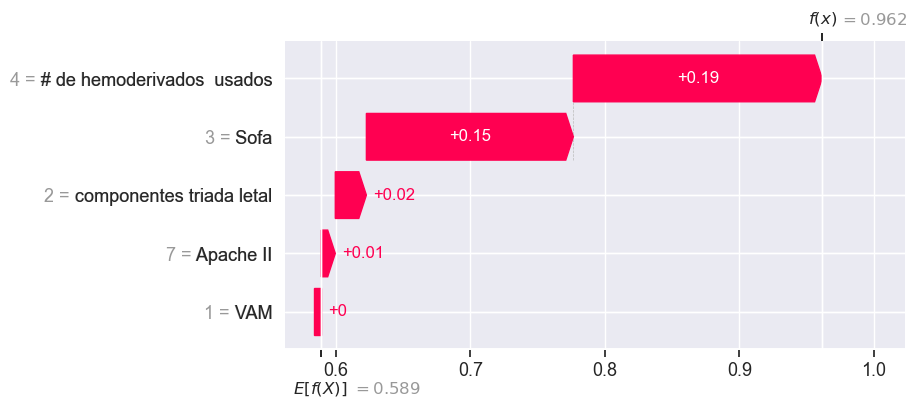

In [10]:
# El primer paciente (resultado real: sobrevivió) fue analizado utilizando el gráfico de cascada (waterfall plot) de SHAP.
fig = plt.figure()
shap.plots.waterfall(shap_values[0, :, 0])
fig.savefig('../figures/1er_paciente_expl.png', dpi = 300, bbox_inches='tight')

- Probabilidad base (E[f(X)]): 58.9%

- Predicción final (f(x)): 96.2% de probabilidad de supervivencia

El modelo partió de una tasa base de supervivencia (58.9%) y aumentó la probabilidad a 96.2% basándose en los marcadores clínicos favorables de este paciente.  
El incremento del 37.3% en la probabilidad fue resultado de factores protectores presentes en las 5 características clave, alineándose finalmente con el resultado real.


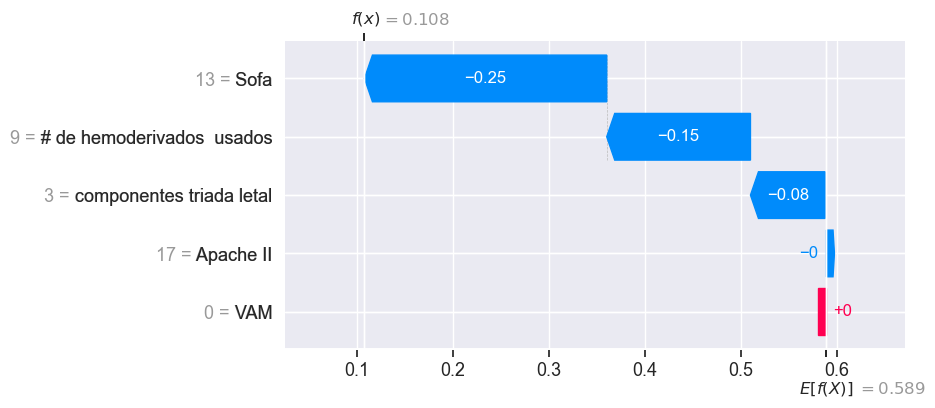

In [11]:
# El segundo paciente (resultado real: fallecido) fue analizado utilizando el gráfico de cascada (waterfall plot) de SHAP.
fig = plt.figure()
shap.plots.waterfall(shap_values[1, :, 0])
fig.savefig('../figures/2do_paciente_expl.png', dpi = 300, bbox_inches='tight')

El modelo predijo correctamente una probabilidad de supervivencia del 10%, consistente con el resultado real del paciente (fallecido).

#### Análisis del impacto global de características

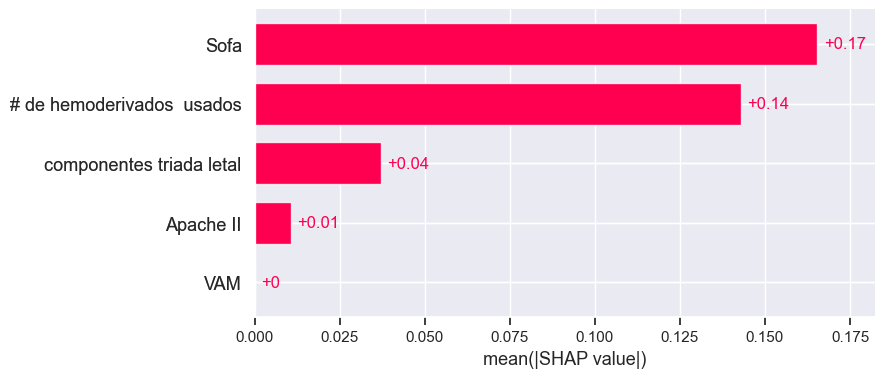

In [12]:
# Gráfico de barras global de importancia de características
fig = plt.figure()
shap.plots.bar(shap_values[:,:,0])
fig.savefig('../figures/impacto_global.png', dpi = 300, bbox_inches='tight')

### Hallazgos Clave:

**SOFA:**

- Mayor valor medio absoluto de SHAP (≈0.17)

- Predictor dominante de los resultados de supervivencia

- Consistente con el conocimiento clínico: las puntuaciones de fallo orgánico impactan críticamente el pronóstico

**Hemoderivados:**

- Segundo impacto más alto (≈0.14)

- Factor secundario significativo: la necesidad de transfusiones indica inestabilidad hemodinámica crítica

**Componentes de la Triada Letal:**

- Contribución moderada (≈0.04)

- Impacto moderado: la presencia de elementos de la triada letal contribuye a la estratificación del riesgo

**Apache II:**

- Impacto bajo (≈0.01)

- Influencia mínima: la puntuación general de severidad es opacada por marcadores clínicos específicos

**VAM:**

- Menor influencia (≈0.00)

- Contribución insignificante: los parámetros de ventilación no mostraron impacto medible en este modelo

El bajo posicionamiento de VAM sugiere que los parámetros de ventilación pueden ser importantes en situaciones específicas, pero no son decisivos de manera universal.

Esta visión global confirma que nuestra estrategia de selección de características priorizó variables con el mayor poder predictivo general para los resultados de supervivencia.


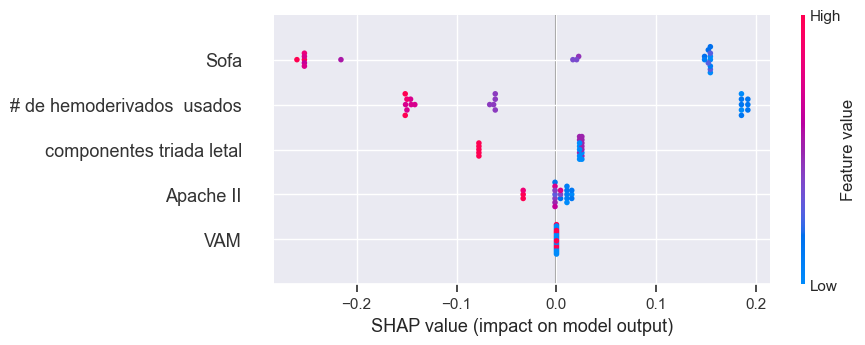

In [13]:
# Generar un gráfico beeswarm de SHAP para visualizar la dispersión de las características
fig = plt.figure()
shap.plots.beeswarm(shap_values[:,:,0])
fig.savefig('../figures/dispersion_expl.png', dpi = 300, bbox_inches='tight')